Import Library

Penjelasan Proses:
Pada tahap ini, kita mengimpor semua library yang diperlukan untuk proyek machine learning prediksi banjir. Library yang digunakan meliputi:

- Pandas: untuk manipulasi dan analisis data
- NumPy: untuk operasi numerik
- Matplotlib & Seaborn: untuk visualisasi data
- Scikit-learn: untuk preprocessing, modeling, dan evaluasi
- XGBoost: untuk algoritma machine learning boosting
- Scipy: untuk uji statistik

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix


Data Understanding

Data Loading

- Memuat dataset banjir dari file CSV ke dalam pandas DataFrame untuk memulai proses analisis data.

In [36]:
df = pd.read_csv("data_banjir.csv")

Penjelasan Hasil:
Dataset berhasil dimuat dan siap untuk tahap eksplorasi data selanjutnya.

- menampilkan 5 data pertama pada dataset

In [ ]:
df.head()

,NAME_2,NAME_3,avg_rainfall,max_rainfall,avg_temperature,elevation,landcover_class,ndvi,slope,soil_moisture,year,month,banjir,lat,long
0,Kota Pekalongan,pekalonganutara,128.695,187.903,31.65,3.721,Unknown,0.232,0.095,39.672,2021,2,1,-6.8709,109.6848
1,bekasi,cikarangbarat,6.997,14.642,40.23,29.644,Built-up,0.309,0.174,19.056,2023,10,0,-6.2973,107.0941
2,Kudus,mejobo,61.197,123.598,31.26,9.259,Unknown,0.531,0.105,38.705,2020,2,1,-6.8399,110.8888
3,jakarta utara,kelapagading,41.057,70.851,36.29,5.514,Built-up,0.228,0.062,38.154,2024,3,0,-6.1610,106.9037
4,Kepulauan Mentawai,siberutselatan,65.607,117.585,25.12,96.178,Unknown,0.710,1.694,31.900,2024,8,1,-1.5290,99.0577


Penjelasan Hasil:
Dari tampilan awal data, kita dapat melihat struktur dataset dan jenis variabel yang tersedia.

Analysis Data

- menampilkan struktur data dan type data setiap kolom pada dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME_2           3000 non-null   object 
 1   NAME_3           3000 non-null   object 
 2   avg_rainfall     3000 non-null   float64
 3   max_rainfall     3000 non-null   float64
 4   avg_temperature  3000 non-null   float64
 5   elevation        3000 non-null   float64
 6   landcover_class  3000 non-null   object 
 7   ndvi             3000 non-null   float64
 8   slope            3000 non-null   float64
 9   soil_moisture    3000 non-null   float64
 10  year             3000 non-null   int64  
 11  month            3000 non-null   int64  
 12  banjir           3000 non-null   int64  
 13  lat              3000 non-null   float64
 14  long             3000 non-null   float64
dtypes: float64(9), int64(3), object(3)
memory usage: 351.7+ KB


- menampilkan dan mengecek ada berapa jumlah baris dan kolom pada dataset

In [ ]:
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")

Jumlah baris: 3000, Jumlah kolom: 15


- menampilkan dan mengecek jumlah nilai unik pada setiap kolom

In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} nilai unik")

NAME_2: 302 nilai unik
NAME_3: 1151 nilai unik
avg_rainfall: 2947 nilai unik
max_rainfall: 2968 nilai unik
avg_temperature: 1411 nilai unik
elevation: 1172 nilai unik
landcover_class: 9 nilai unik
ndvi: 717 nilai unik
slope: 935 nilai unik
soil_moisture: 2201 nilai unik
year: 5 nilai unik
month: 12 nilai unik
banjir: 2 nilai unik
lat: 1164 nilai unik
long: 1169 nilai unik


Penjelasan Hasil:
Dataset terdiri dari 3000 sampel dengan 15 kolom fitur. Beberapa kolom seperti NAME_3, lat, dan long memiliki kardinalitas tinggi yang perlu dipertimbangkan dalam preprocessing.

- Menghitung statistik deskriptif untuk fitur numerik guna memahami distribusi dan karakteristik data.

In [ ]:
df.describe()

,avg_rainfall,max_rainfall,avg_temperature,elevation,ndvi,slope,soil_moisture,year,month,banjir,lat,long
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,46.948207,86.895606,31.890051,162.064692,0.496991,1.506509,36.320374,2022.070000,6.185667,0.500000,-5.025765,108.228715
std,25.833946,45.635274,4.741584,259.232358,0.182107,2.254271,4.006204,1.392748,3.750629,0.500083,3.195729,5.537914
min,0.554000,1.003000,11.490000,1.246000,0.087000,0.026000,16.441000,2020.000000,1.000000,0.000000,-10.855200,95.241700
25%,27.377000,56.521250,28.147500,13.385000,0.347000,0.129000,34.356750,2021.000000,3.000000,0.000000,-6.570800,106.630200
50%,44.604000,81.151000,31.215000,44.431000,0.500500,0.287500,37.423000,2022.000000,6.000000,0.500000,-6.243650,106.864950
75%,63.112250,111.872000,36.072500,184.459000,0.648000,1.994250,38.817250,2023.000000,10.000000,1.000000,-6.058375,109.144500
max,222.600000,375.780000,43.280000,1814.735000,0.891000,11.361000,42.777000,2024.000000,12.000000,1.000000,5.540800,140.652000


Penjelasan Hasil:
Statistik deskriptif memberikan gambaran tentang range nilai, mean, median, dan distribusi data numerik yang akan membantu dalam tahap preprocessing.

- Memeriksa keberadaan missing values dalam dataset untuk menentukan strategi penanganan data yang hilang.

In [ ]:
print("\nMissing values per kolom:")
print(df.isnull().sum())


Missing values per kolom:
NAME_2             0
NAME_3             0
avg_rainfall       0
max_rainfall       0
avg_temperature    0
elevation          0
landcover_class    0
ndvi               0
slope              0
soil_moisture      0
year               0
month              0
banjir             0
lat                0
long               0
dtype: int64


Penjelasan Hasil:
Insight: Berdasarkan hasil pengecekan, tidak terdapat missing values pada dataset. Hal ini menunjukkan dataset sudah bersih dan siap untuk tahap analisis selanjutnya tanpa memerlukan teknik imputasi data.

- Menganalisis distribusi variabel target (banjir) untuk memahami keseimbangan kelas dan menentukan apakah diperlukan teknik balancing.

In [ ]:
banjir_dist = df['banjir'].value_counts()
print("\nDistribusi target (banjir):")
print(banjir_dist)


Distribusi target (banjir):
banjir
1    1500
0    1500
Name: count, dtype: int64


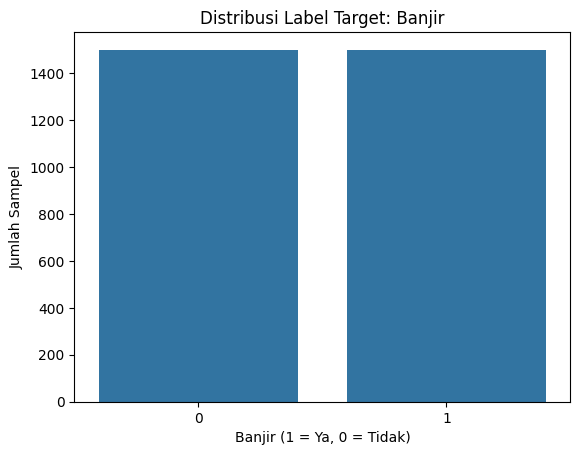

In [ ]:
sns.countplot(x='banjir', data=df)
plt.title("Distribusi Label Target: Banjir")
plt.xlabel("Banjir (1 = Ya, 0 = Tidak)")
plt.ylabel("Jumlah Sampel")
plt.show()


Penjelasan Hasil:
Insight: Distribusi target menunjukkan keseimbangan yang baik antara kelas positif (banjir) dan negatif (tidak banjir). Hal ini mengindikasikan bahwa tidak diperlukan teknik resampling untuk mengatasi ketidakseimbangan kelas.

- Mengeksplorasi distribusi fitur kategorikal seperti landcover_class dan wilayah administratif untuk memahami variasi dalam data.

In [45]:
print("Kategori landcover_class:")
print(df['landcover_class'].value_counts())

Kategori landcover_class:
landcover_class
Built-up                  954
Unknown                   815
Tree cover                478
Tree Cover                457
Cropland                  265
Permanent water bodies     14
Built-Up                   11
Permanent Water Bodies      4
Mangroves                   2
Name: count, dtype: int64


In [46]:
print("\nWilayah NAME_2 (Kabupaten/Kota):")
print(df['NAME_2'].value_counts())



Wilayah NAME_2 (Kabupaten/Kota):
NAME_2
bogor                 355
tangerang             256
bekasi                218
kota tangerang        122
depok                 102
                     ... 
Kota Kediri             1
Nias Selatan            1
Seram Bagian Barat      1
Pringsewu               1
Samosir                 1
Name: count, Length: 302, dtype: int64


In [47]:
print("\nWilayah NAME_3 (Kecamatan):")
print(df['NAME_3'].value_counts())


Wilayah NAME_3 (Kecamatan):
NAME_3
tamansari      23
cipayung       22
setu           20
kalideres      17
sukadiri       17
               ..
sawa            1
modo            1
nogosari        1
lunyuk          1
manyakpayed     1
Name: count, Length: 1151, dtype: int64


Penjelasan:
Insight:

Fitur kategorikal menunjukkan variasi yang cukup beragam. Kolom NAME_3 (nama kecamatan) memiliki kardinalitas sangat tinggi dengan 1.151 kategori unik, yang dapat menyulitkan model dalam proses pembelajaran. Oleh karena itu, perlu dipertimbangkan untuk menghapus fitur ini atau menggunakan strategi lain dalam preprocessing, seperti encoding khusus (misalnya target encoding atau pengelompokan berdasarkan frekuensi/populasi).

### Analisis Keseluruhan Hasil EDA Dataset

Dataset terdiri dari 3000 sampel dengan 15 kolom fitur. Target `banjir` memiliki distribusi seimbang antara 1 dan 0, sehingga tidak diperlukan teknik penyeimbangan (resampling).

Beberapa fitur memiliki nilai unik yang tinggi, khususnya `NAME_3` dan `lat/long`, yang dapat menyebabkan sparsity jika diolah tanpa seleksi. Oleh karena itu, fitur-fitur tersebut akan dianalisis lebih lanjut untuk menentukan relevansinya terhadap model. Fitur kategorikal `landcover_class` akan diencoding, sedangkan waktu (`year`, `month`) akan disertakan sebagai fitur prediktif.

Tidak ditemukan missing value dalam dataset.

## Univariate Analysis

Univariate analysis dilakukan untuk memahami karakteristik masing-masing fitur secara individu. Analisis ini membantu mengidentifikasi distribusi data, pola umum, serta mendeteksi adanya nilai-nilai ekstrim (outlier). Visualisasi juga digunakan untuk mengevaluasi proporsi kategori pada fitur kategorikal.

UVA dibagi menjadi dua bagian:
- Analisis fitur numerik: distribusi, outlier
- Analisis fitur kategorikal: proporsi kelas


- memilih numerik selain target

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('banjir')

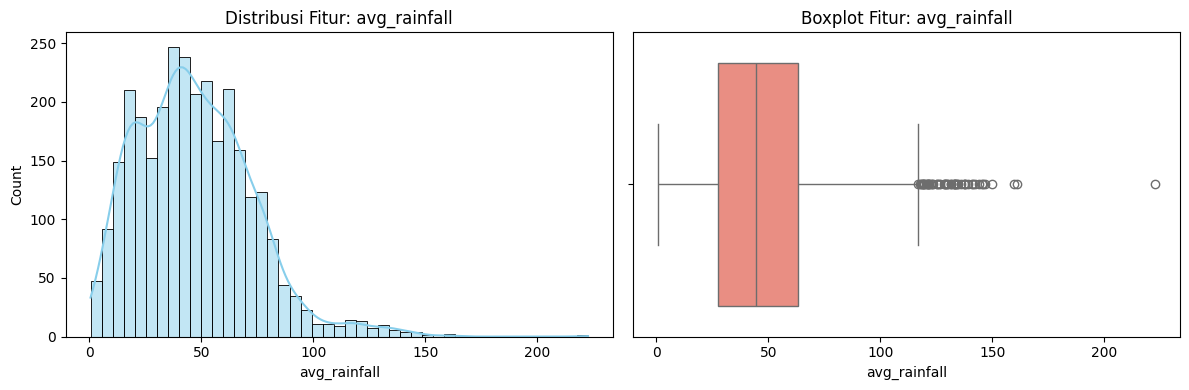

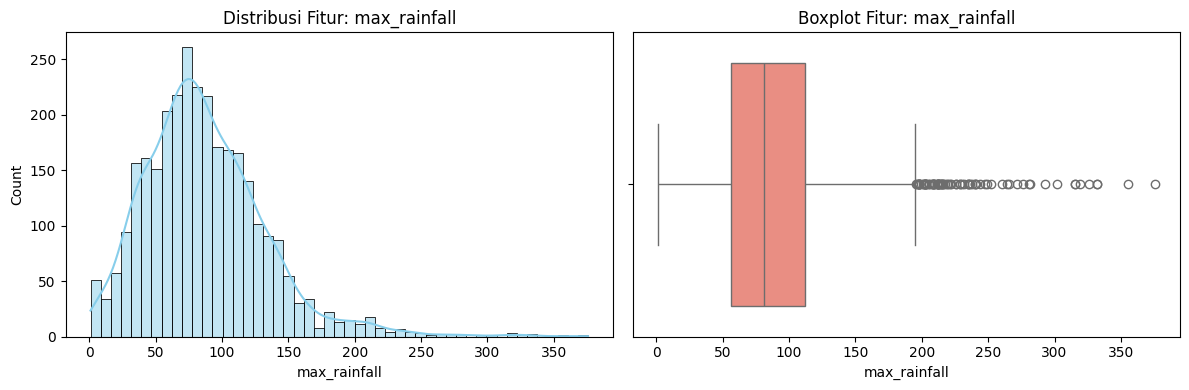

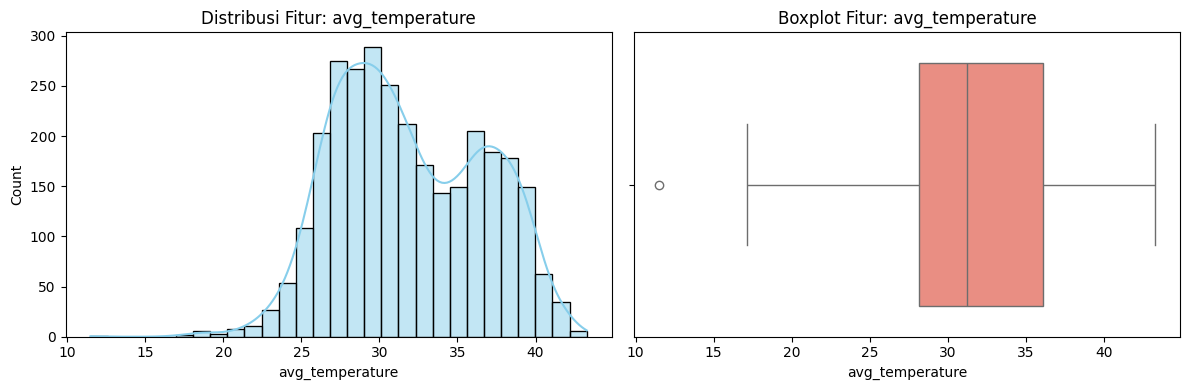

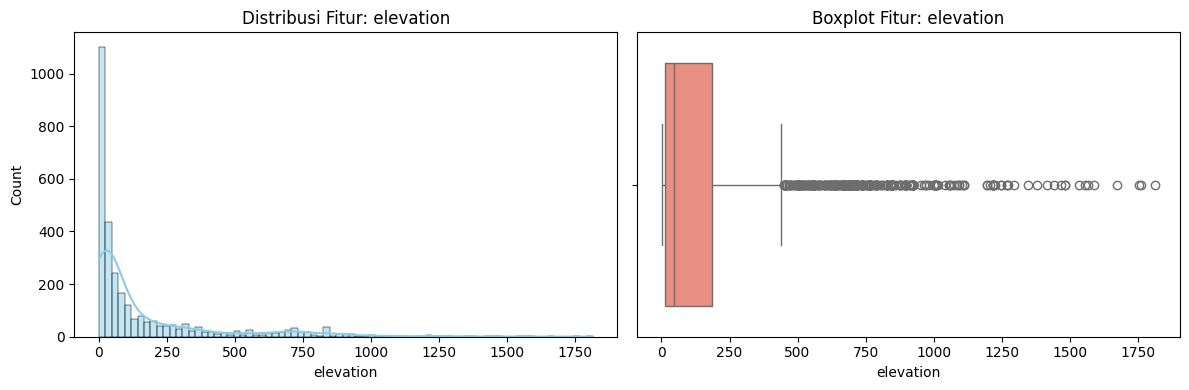

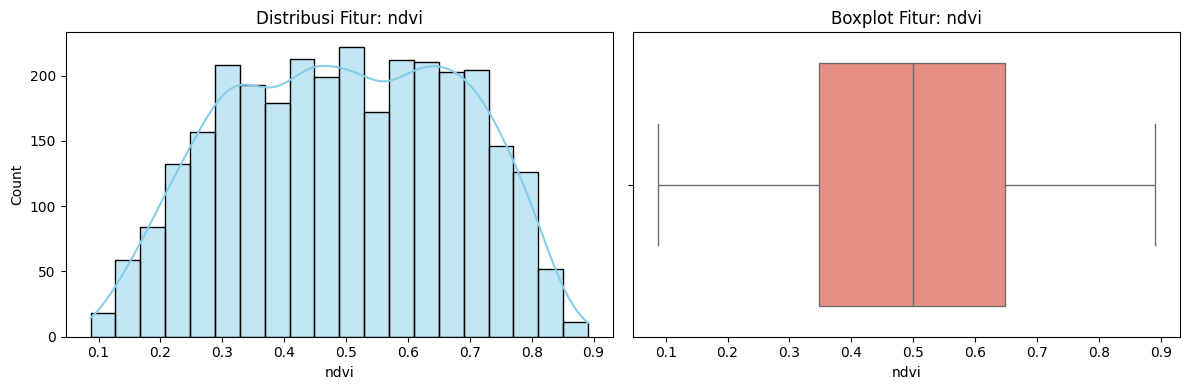

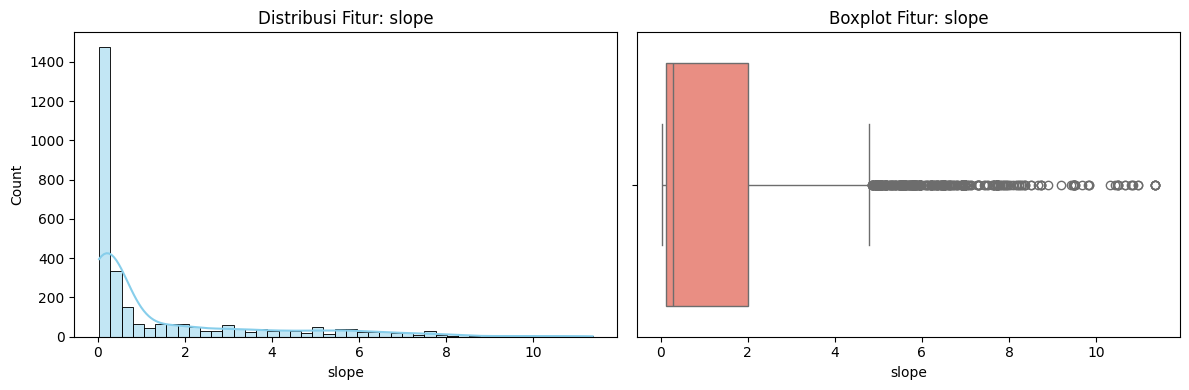

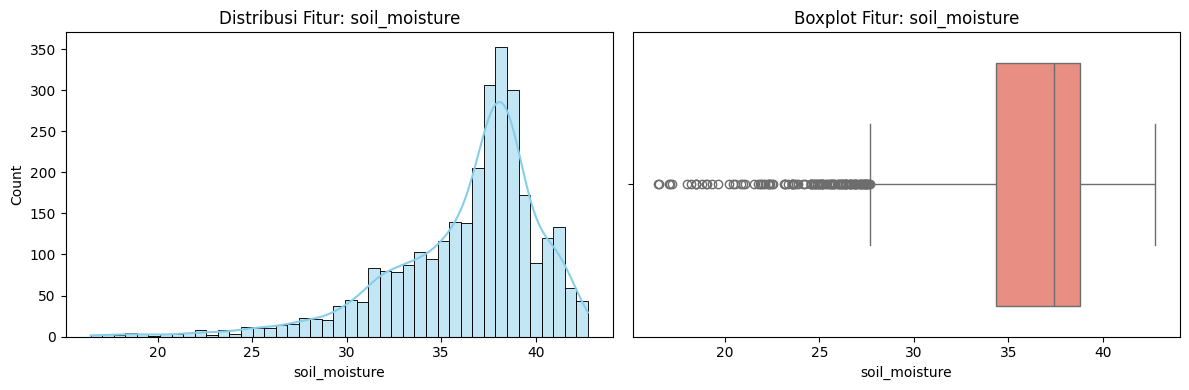

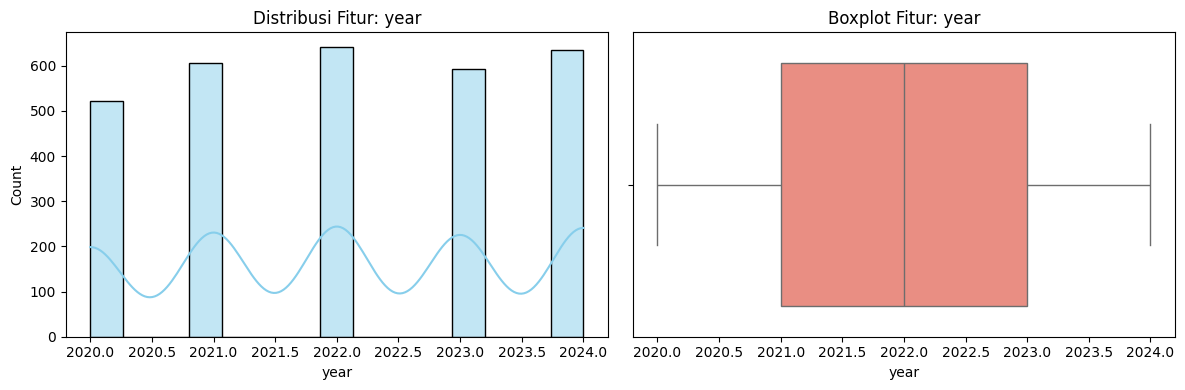

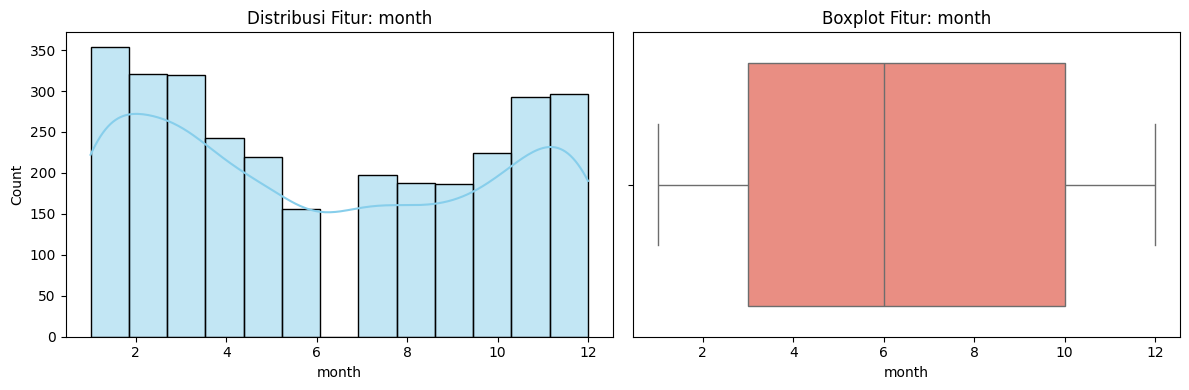

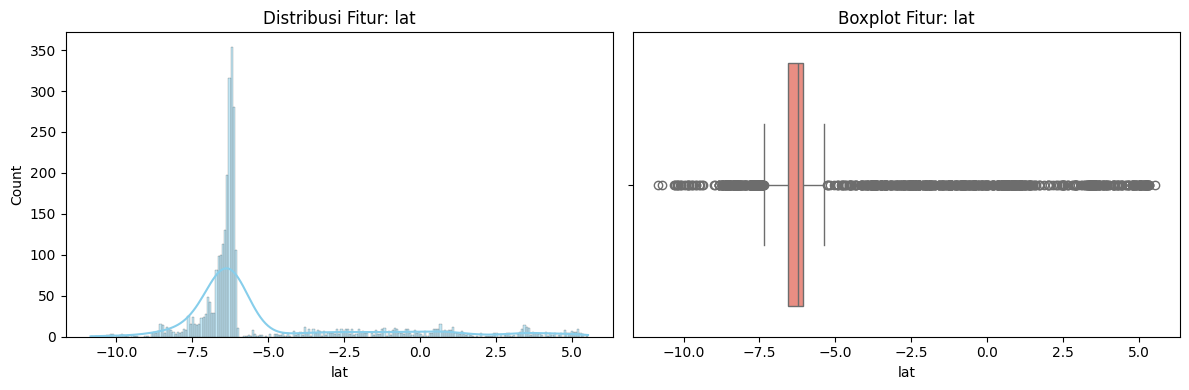

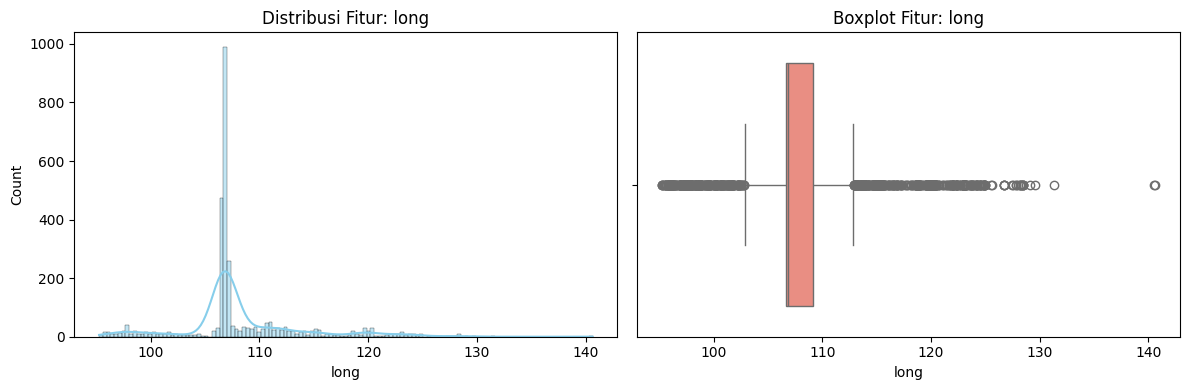

In [49]:
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribusi Fitur: {col}')
    
    sns.boxplot(x=df[col], ax=axes[1], color='salmon')
    axes[1].set_title(f'Boxplot Fitur: {col}')
    
    plt.tight_layout()
    plt.show()

- mendeteksi outlier dengan IQR

In [ ]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_mask = (df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)
    n_outliers = outlier_mask.sum()
    print(f"{col}: {n_outliers} outlier")

avg_rainfall: 52 outlier
max_rainfall: 81 outlier
avg_temperature: 1 outlier
elevation: 364 outlier
ndvi: 0 outlier
slope: 362 outlier
soil_moisture: 114 outlier
year: 0 outlier
month: 0 outlier
lat: 944 outlier
long: 716 outlier


Penjelasan Hasil:
Insight: Analisis distribusi menunjukkan bahwa beberapa fitur memiliki distribusi yang tidak normal dan terdapat outlier pada beberapa variabel. Informasi ini akan digunakan untuk menentukan strategi preprocessing yang tepat.

terdapat outlier, tetapi ini tidak dihapus karena outlier tersebut wajar sebab data yang digunakan merupakan data yang bukan angka konsisten seperti harga. disini ada latitude longitude yang memang sangat jauh jaraknya.

---------------------------------------------------------------------------------------

- Menganalisis proporsi dan distribusi fitur kategorikal untuk memahami representasi setiap kategori dalam dataset.


Distribusi kategori: NAME_2
NAME_2
bogor                 12.0
tangerang              9.0
bekasi                 7.0
kota tangerang         4.0
depok                  3.0
                      ... 
Kota Kediri            0.0
Nias Selatan           0.0
Seram Bagian Barat     0.0
Pringsewu              0.0
Samosir                0.0
Name: proportion, Length: 302, dtype: float64


D:\Temp\ipykernel_19000\1767512875.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='pastel')


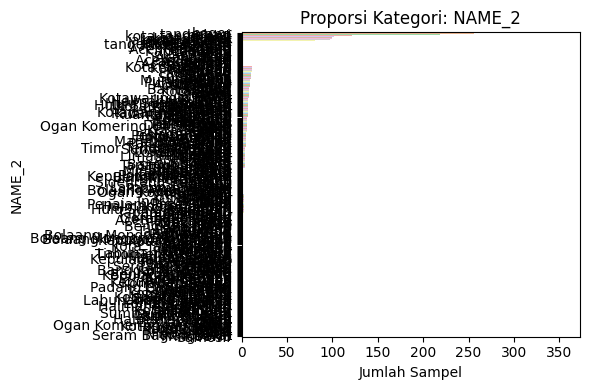


Distribusi kategori: NAME_3
NAME_3
tamansari      1.0
cipayung       1.0
setu           1.0
kalideres      1.0
sukadiri       1.0
              ... 
sawa           0.0
modo           0.0
nogosari       0.0
lunyuk         0.0
manyakpayed    0.0
Name: proportion, Length: 1151, dtype: float64


D:\Temp\ipykernel_19000\1767512875.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='pastel')


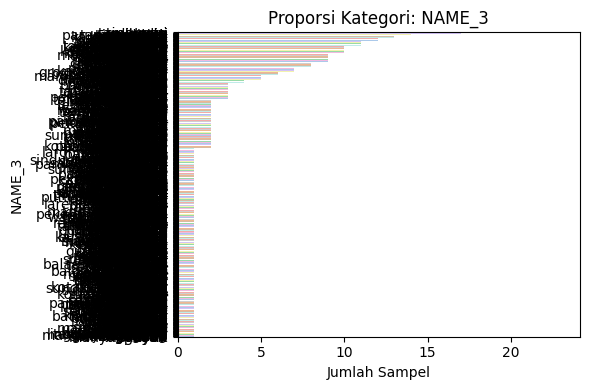


Distribusi kategori: landcover_class
landcover_class
Built-up                  32.0
Unknown                   27.0
Tree cover                16.0
Tree Cover                15.0
Cropland                   9.0
Permanent water bodies     0.0
Built-Up                   0.0
Permanent Water Bodies     0.0
Mangroves                  0.0
Name: proportion, dtype: float64


D:\Temp\ipykernel_19000\1767512875.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='pastel')


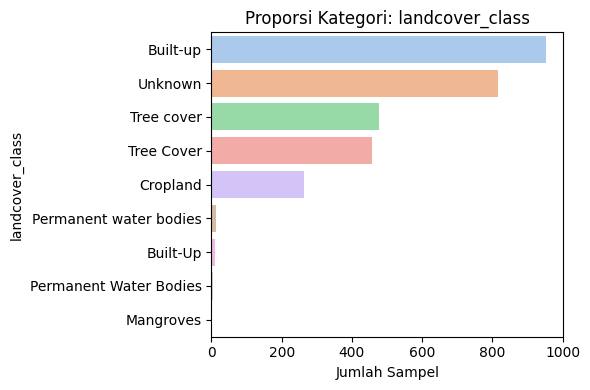

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nDistribusi kategori: {col}")
    print(df[col].value_counts(normalize=True).round(2) * 100)

    plt.figure(figsize=(6, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='pastel')
    plt.title(f'Proporsi Kategori: {col}')
    plt.xlabel("Jumlah Sampel")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


Penjelasan Hasil :
Insight: Analisis distribusi fitur kategorikal menunjukkan bahwa beberapa fitur seperti NAME_2 dan landcover_class memiliki dominasi kategori tertentu (misal "bogor", "Built-up"), sementara sebagian besar kategori lainnya memiliki representasi yang sangat rendah hingga nol. Ketidakseimbangan ini penting untuk diperhatikan saat feature engineering, karena dapat memengaruhi kinerja model dan menyebabkan bias terhadap kategori mayoritas.

## Multivariate Analysis

Analisis multivariat dilakukan untuk melihat hubungan antar variabel, baik antara fitur numerik satu sama lain maupun antara fitur dengan variabel target (`banjir`). Teknik yang digunakan meliputi:

- Korelasi Pearson antar fitur numerik
- Heatmap korelasi
- Uji Chi-Square untuk fitur kategorikal terhadap label


- disini menghitung korelasi dan memvisualisasikan heatmap korelasi

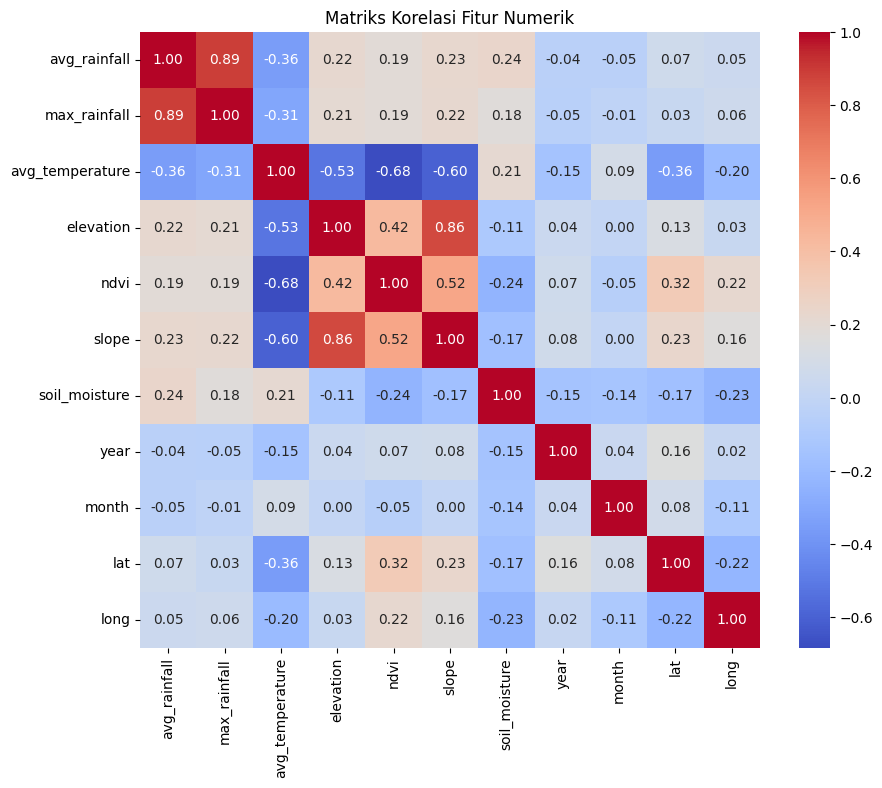

In [ ]:
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Fitur Numerik")
plt.show()

#### Penjelasan hasil
Heatmap korelasi mengungkapkan hubungan linear antar fitur numerik. Korelasi tinggi (>|0.8|) antara fitur seperti avg_rainfall & max_rainfall serta slope & elevation mengindikasikan potensi multikolinearitas, yang perlu diperhatikan terutama dalam model linear. Jika multikolinearitas ditemukan, kita bisa melakukan feature selection atau dimensionality reduction (seperti PCA) untuk mengurangi dampaknya.
Heatmap korelasi menunjukkan kekuatan dan arah hubungan linear antar fitur numerik. Nilai korelasi berkisar dari:

+1: korelasi positif sempurna (fitur meningkat bersama),

0: tidak ada hubungan linear,

-1: korelasi negatif sempurna (satu naik, yang lain turun).



### Chi-Square Test of Independence

Untuk fitur kategorikal seperti `landcover_class` dan `NAME_2`, digunakan uji Chi-Square untuk menilai apakah distribusi kategori memiliki hubungan signifikan terhadap label `banjir`.


- mengambil semua kolom bertipe kategorikal

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns

- List untuk menyimpan hasil uji

In [ ]:
chi_square_results = []

- Menguji Chi-Square untuk setiap kolom kategorikal terhadap target 'banjir'

In [ ]:
for col in categorical_cols:
    contingency = pd.crosstab(df[col], df['banjir'])
    chi2, p, dof, expected = chi2_contingency(contingency)

    chi_square_results.append({
        'Fitur': col,
        'Chi-Square': round(chi2, 4),
        'p-value': round(p, 6),
        'Degrees of Freedom': dof,
        'Signifikan (p < 0.05)': 'Ya' if p < 0.05 else 'Tidak'
    })

- Mengubah ke DataFrame dan menampilkan hasil

In [ ]:
chi_square_df = pd.DataFrame(chi_square_results)
chi_square_df = chi_square_df.sort_values(by='p-value')

chi_square_df


,Fitur,Chi-Square,p-value,Degrees of Freedom,Signifikan (p < 0.05)
0,NAME_2,2403.7847,0.0,301,Ya
1,NAME_3,2478.0353,0.0,1150,Ya
2,landcover_class,2278.3491,0.0,8,Ya


- Mengubah nama kolom agar cocok denga DataFrame sebelumnya dan menampilkan hasil rangking fitur dengan plot

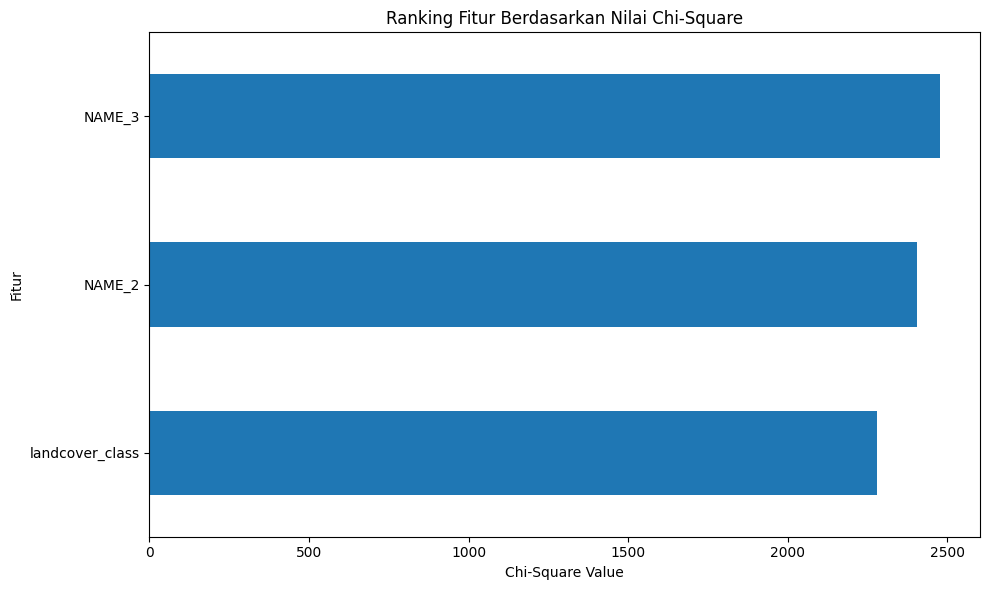

In [ ]:
chi2_df_sorted = chi_square_df.sort_values(by='Chi-Square', ascending=True)

chi2_df_sorted.plot(x='Fitur', y='Chi-Square', kind='barh', figsize=(10, 6), legend=False)
plt.title('Ranking Fitur Berdasarkan Nilai Chi-Square')
plt.xlabel('Chi-Square Value')
plt.tight_layout()
plt.show()


Penjelasan Hasil:
Insight: Hasil uji Chi-Square menunjukkan tingkat signifikansi hubungan antara setiap fitur kategorikal dengan target. Fitur dengan p-value < 0.05 dianggap memiliki hubungan yang signifikan dengan kejadian banjir dan akan diprioritaskan dalam model.

## Data Preparation

Tahapan ini mencakup pembersihan data, encoding fitur kategorikal, dan normalisasi fitur numerik sebelum dilakukan pelatihan model.

- Kolom `landcover_class` dibersihkan dari variasi penulisan dengan lowercasing dan normalisasi label.
- Kolom `NAME_3`, `lat`, dan `long` dihapus karena memiliki nilai unik sangat banyak (high cardinality).
- Fitur kategorikal `landcover_class` dan `NAME_2` diencoding dengan metode one-hot.
- Fitur numerik dinormalisasi menggunakan StandardScaler.
- Data dibagi ke dalam data latih dan data uji dengan rasio 80:20 secara stratified untuk menjaga proporsi kelas target.

- Mengcopy dataset asli, agar lebih fleksibel dalam penggunaannya

In [ ]:
df_prep = df.copy()

- Memperbaiki inkonsistensi pada landcover_class

In [ ]:
df_prep['landcover_class'] = df_prep['landcover_class'].str.strip().str.lower()
df_prep['landcover_class'] = df_prep['landcover_class'].replace({
    'built-up': 'built_up',
    'built_up': 'built_up',
    'tree cover': 'tree_cover',
    'tree_cover': 'tree_cover',
    'permanent water bodies': 'water',
    'permanent_water_bodies': 'water',
    'permanent waterbodies': 'water',
})

- Visualisasi distribusi kategori setelah pembersihan

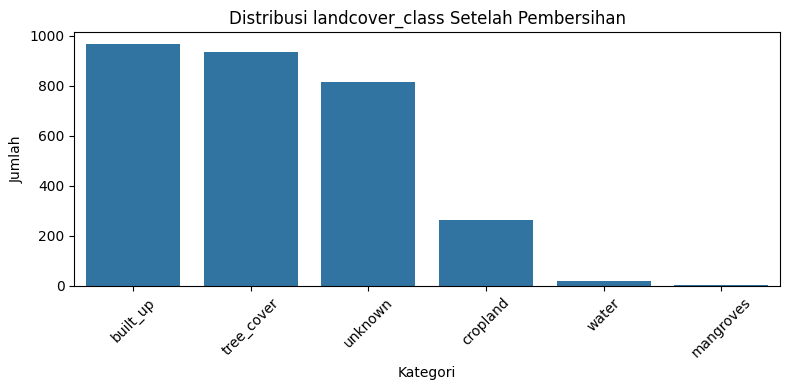

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_prep, x='landcover_class', order=df_prep['landcover_class'].value_counts().index)
plt.title("Distribusi landcover_class Setelah Pembersihan")
plt.xlabel("Kategori")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Penjelasan Hasil:
Insight: Pembersihan data berhasil mengatasi inkonsistensi penulisan pada kategori landcover_class, sehingga kategori yang seharusnya sama tidak lagi terpecah menjadi kategori terpisah.

Drop kolom

- Menghapus fitur dengan kardinalitas tinggi (NAME_3, lat, long) yang dapat menyebabkan overfitting dan meningkatkan kompleksitas model tanpa memberikan nilai prediktif yang signifikan.

In [ ]:
df_prep.drop(columns=['NAME_3', 'lat', 'long'], inplace=True)
print("\nKolom setelah drop kolom high cardinality:")
print(df_prep.columns.tolist())


Kolom setelah drop kolom high cardinality:
['NAME_2', 'avg_rainfall', 'max_rainfall', 'avg_temperature', 'elevation', 'landcover_class', 'ndvi', 'slope', 'soil_moisture', 'year', 'month', 'banjir']


Insight: Penghapusan fitur high cardinality mengurangi dimensi data dan kompleksitas model, sambil mempertahankan fitur yang lebih relevan untuk prediksi.

Encoding Data

- Mengkonversi fitur kategorikal (landcover_class dan NAME_2) menjadi format numerik menggunakan one-hot encoding agar dapat diproses oleh algoritma machine learning.

In [ ]:
df_prep = pd.get_dummies(df_prep, columns=['landcover_class', 'NAME_2'], drop_first=True)

print("\nJumlah kolom setelah one-hot encoding:", df_prep.shape[1])
print("Contoh kolom setelah encoding:")
print(df_prep.columns[:15])


Jumlah kolom setelah one-hot encoding: 316
Contoh kolom setelah encoding:
Index(['avg_rainfall', 'max_rainfall', 'avg_temperature', 'elevation', 'ndvi',
       'slope', 'soil_moisture', 'year', 'month', 'banjir',
       'landcover_class_cropland', 'landcover_class_mangroves',
       'landcover_class_tree_cover', 'landcover_class_unknown',
       'landcover_class_water'],
      dtype='object')


Insight: One-hot encoding berhasil mengkonversi fitur kategorikal menjadi variabel dummy numerik. Jumlah kolom meningkat sesuai dengan jumlah kategori unik dalam setiap fitur kategorikal.

Splitting Data

- Membagi dataset menjadi training set dan testing set dengan rasio 80:20. Menggunakan stratified sampling untuk mempertahankan proporsi kelas target yang seimbang.

In [ ]:
X = df_prep.drop('banjir', axis=1)
y = df_prep['banjir']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [63]:
print("\nUkuran data setelah split:")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")
print(f"Distribusi target (train):\n{y_train.value_counts()}")
print(f"Distribusi target (test):\n{y_test.value_counts()}")


Ukuran data setelah split:
Train: (2400, 315), Test: (600, 315)
Distribusi target (train):
banjir
1    1200
0    1200
Name: count, dtype: int64
Distribusi target (test):
banjir
1    300
0    300
Name: count, dtype: int64


Insight: Data berhasil dibagi dengan proporsi yang seimbang. Stratified sampling memastikan bahwa distribusi kelas target pada training dan testing set konsisten dengan dataset asli.

Normalisasi Data

- Melakukan normalisasi fitur numerik menggunakan StandardScaler untuk memastikan semua fitur memiliki skala yang sama, yang penting untuk algoritma machine learning yang sensitif terhadap skala data.

- Menormalisasi fitur numerik (kecuali hasil one-hot)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Mengambil nama kolom numerik (sebelum encoding)

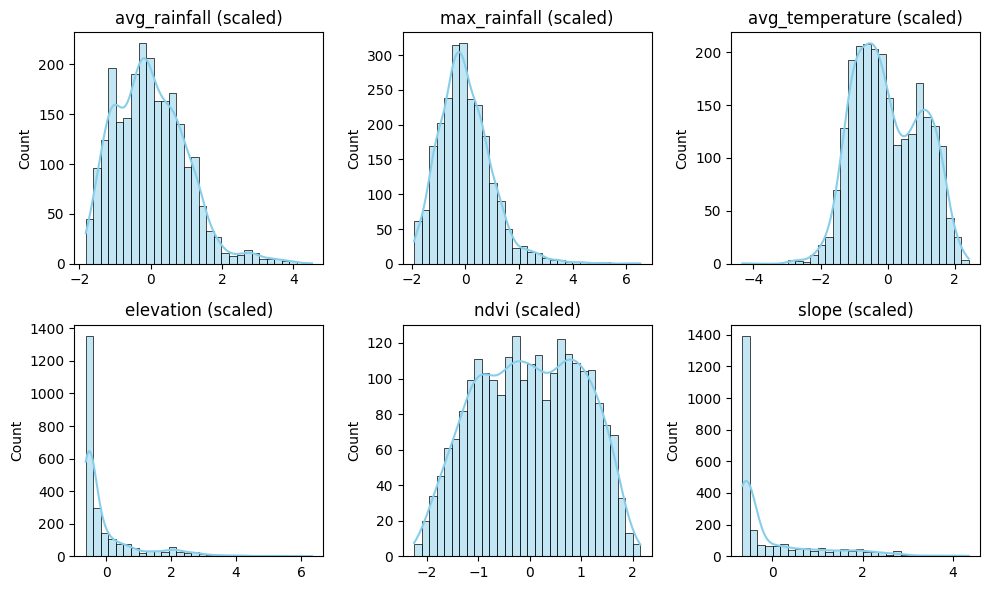

In [ ]:
numeric_cols_scaled = df.select_dtypes(include=['int64', 'float64']).drop(columns=['banjir', 'lat', 'long']).columns

plt.figure(figsize=(10, 6))
for i, col in enumerate(numeric_cols_scaled[:6]):  # tampilkan 6 pertama
    plt.subplot(2, 3, i+1)
    sns.histplot(X_train_scaled[:, i], bins=30, kde=True, color='skyblue')
    plt.title(f"{col} (scaled)")
plt.tight_layout()
plt.show()

#### Insight:
Normalisasi berhasil diterapkan pada fitur numerik. Proses ini dilakukan dengan:

- Fitting scaler (misalnya StandardScaler) hanya pada data training untuk menghindari data leakage.

- Kemudian transformasi diterapkan ke data training dan testing menggunakan scaler yang sama.

Grafik distribusi menunjukkan hasil normalisasi (standardisasi) dari beberapa fitur numerik (fitur dikurangi rata-rata dan dibagi standar deviasi).

#### Observasi per fitur:
- avg_rainfall & max_rainfall: Distribusi cenderung positif skewed, namun tetap dalam skala yang seragam (mean mendekati 0).

- avg_temperature: Distribusi mendekati normal, namun sedikit multimodal.

- elevation & slope: Terlihat sangat skewed ke kanan, menunjukkan adanya banyak nilai rendah dan beberapa outlier tinggi.

- ndvi: Sebaran cukup simetris dan mendekati normal, cocok dengan karakteristik NDVI (nilai antara -1 sampai 1 atau lebih tergantung konteks scaling awal).



## Modeling

Pada tahap ini, dua algoritma klasifikasi digunakan:

1. **Random Forest**: model berbasis ensemble decision tree yang tangguh terhadap overfitting dan mampu menangani data numerik dan kategorikal.
2. **XGBoost**: model boosting yang populer karena efisiensi dan akurasinya.

Evaluasi dilakukan menggunakan metrik: accuracy, precision, recall, dan F1-score pada data uji.

- Melatih model Random Forest Classifier, yang merupakan algoritma ensemble berbasis decision tree yang robust terhadap overfitting dan mampu menangani fitur numerik dan kategorikal.

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [67]:
print("=== Random Forest ===")
y_pred_rf = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       300
           1       1.00      0.88      0.93       300

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600

Confusion Matrix:
 [[299   1]
 [ 37 263]]


- Melatih model XGBoost Classifier, yang merupakan algoritma boosting yang populer karena efisiensi dan akurasi tinggi dalam berbagai kompetisi machine learning.

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

print("\n=== XGBoost ===")
y_pred_xgb = xgb_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


=== XGBoost ===
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       300
           1       0.96      0.90      0.93       300

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600

Confusion Matrix:
 [[290  10]
 [ 31 269]]


C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\xgboost\training.py:183: UserWarning: [02:51:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


- Membandingkan performa kedua model berdasarkan akurasi untuk menentukan model terbaik untuk prediksi banjir.

In [69]:
rf_acc = rf_model.score(X_test_scaled, y_test)
xgb_acc = xgb_model.score(X_test_scaled, y_test)

print(f"Akurasi Random Forest: {rf_acc:.4f}")
print(f"Akurasi XGBoost:       {xgb_acc:.4f}")


Akurasi Random Forest: 0.9367
Akurasi XGBoost:       0.9317


#### Insight Evaluasi Model:
Perbandingan performa antara model Random Forest dan XGBoost menunjukkan bahwa keduanya memberikan hasil yang sangat baik dalam klasifikasi kejadian banjir, dengan akurasi masing-masing:

- Random Forest: 93.67%

- XGBoost: 93.17%

Namun, jika dilihat lebih dalam melalui precision dan recall:

- Random Forest lebih unggul dalam recall untuk kelas 0 (tidak banjir) (1.00), artinya sangat baik dalam mengenali wilayah yang benar-benar tidak terkena banjir.

- XGBoost lebih baik dalam precision untuk kelas 1 (banjir) (0.96), artinya lebih minim false positive dalam memprediksi wilayah banjir.

Confusion matrix juga mendukung hal ini:

- Random Forest salah mengklasifikasikan 37 wilayah banjir sebagai tidak banjir.

- XGBoost hanya salah 31 pada kasus tersebut, namun lebih sering salah mengklasifikasikan wilayah tidak banjir sebagai banjir.

Oleh karena itu, pemilihan model akhir bisa didasarkan pada prioritas bisnis:

- Jika lebih penting untuk tidak melewatkan prediksi banjir (recall tinggi), maka Random Forest lebih cocok.

- Jika lebih penting untuk menghindari false alarm (precision tinggi), maka XGBoost bisa dipertimbangkan.

#### Kesimpulan Akhir:
Proyek machine learning untuk prediksi banjir telah berhasil diselesaikan melalui tahapan yang terstruktur dan komprehensif, yaitu:

1. Data Understanding:
Dataset terdiri dari 3000 sampel dan 15 fitur numerik dan kategorikal yang telah dipastikan bebas dari nilai hilang.

2. Exploratory Data Analysis (EDA):
Dilakukan analisis statistik dan visualisasi korelasi serta distribusi fitur untuk memahami pola-pola penting dalam data.

3. Data Preparation:
Meliputi pembersihan data, encoding fitur kategorikal, normalisasi fitur numerik, dan pembagian data training-testing secara tepat.

4. Modeling:
Dua model andal, Random Forest dan XGBoost, diterapkan untuk membangun sistem prediksi banjir.

5. Evaluation:
Performa model dibandingkan menggunakan metrik akurasi, precision, recall, f1-score, dan confusion matrix.
Kedua model menunjukkan hasil yang baik, dengan akurasi di atas 93%, menunjukkan potensi tinggi dalam pemanfaatan model ini untuk mitigasi risiko banjir.